# How to create rotated nested grids

In [1]:
import nes
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
%matplotlib inline

## 1. Create dataset

### Define grid details

#### Parent grid

In [3]:
path = '/gpfs/projects/bsc32/models/NES_tutorial_data/O3_all-000_2021080300.nc'
parent_nessy = nes.open_netcdf(path)

#### Rotated nested grid

In [4]:
projection='rotated-nested'
parent_ratio = 0.5
i_parent_start = 20
j_parent_start = 20
n_rlat = 40
n_rlon = 50
nessy = nes.create_nes(comm=None, info=False, projection=projection,
                       parent_grid_path=path, parent_ratio=parent_ratio,
                       i_parent_start=i_parent_start, j_parent_start=j_parent_start,
                       n_rlat=n_rlat, n_rlon=n_rlon)

### Read projection

In [5]:
nessy.projection

<Other Coordinate Operation Transformer: ob_tran>
Description: PROJ-based coordinate operation
Area of Use:
- undefined

In [6]:
nessy.projection_data

{'grid_mapping_name': 'rotated_latitude_longitude',
 'parent_grid_path': '/gpfs/projects/bsc32/models/NES_tutorial_data/O3_all-000_2021080300.nc',
 'parent_ratio': 0.5,
 'i_parent_start': 20,
 'j_parent_start': 20,
 'n_rlat': 40,
 'n_rlon': 50,
 'inc_rlat': np.float64(0.40000152587890625),
 '1st_rlat': np.float64(-23.200000762939453),
 'inc_rlon': np.float64(0.40000152587890625),
 '1st_rlon': np.float64(-31.200000762939453),
 'grid_north_pole_longitude': np.float32(-170.0),
 'grid_north_pole_latitude': np.float32(39.0)}

## 2. Plot

In [7]:
parent_nessy.create_shapefile()

geometry
FID                                                     
0      POLYGON ((-22.21497 16.2204, -22.05071 16.3030...
1      POLYGON ((-22.05071 16.30307, -21.88618 16.385...
2      POLYGON ((-21.88618 16.38536, -21.72137 16.467...
3      POLYGON ((-21.72137 16.46727, -21.55629 16.548...
4      POLYGON ((-21.55629 16.54881, -21.39094 16.629...
...                                                  ...
95116  POLYGON ((87.25127 59.16191, 87.43401 59.01025...
95117  POLYGON ((87.43401 59.01025, 87.61561 58.85849...
95118  POLYGON ((87.61561 58.85849, 87.79608 58.70663...
95119  POLYGON ((87.79608 58.70663, 87.97545 58.55466...
95120  POLYGON ((87.97545 58.55466, 88.15372 58.40259...

[95121 rows x 1 columns]

In [8]:
nessy.create_shapefile()

geometry
FID                                                    
0     POLYGON ((-20.81569 21.02923, -20.46071 21.187...
1     POLYGON ((-20.46071 21.18765, -20.1045 21.3444...
2     POLYGON ((-20.1045 21.3444, -19.74707 21.49948...
3     POLYGON ((-19.74707 21.49948, -19.38842 21.652...
4     POLYGON ((-19.38842 21.65288, -19.02855 21.804...
...                                                 ...
1995  POLYGON ((-7.87339 41.57399, -7.35841 41.66807...
1996  POLYGON ((-7.35841 41.66807, -6.84183 41.75947...
1997  POLYGON ((-6.84183 41.75947, -6.32368 41.84819...
1998  POLYGON ((-6.32368 41.84819, -5.80401 41.93421...
1999  POLYGON ((-5.80401 41.93421, -5.28284 42.01751...

[2000 rows x 1 columns]

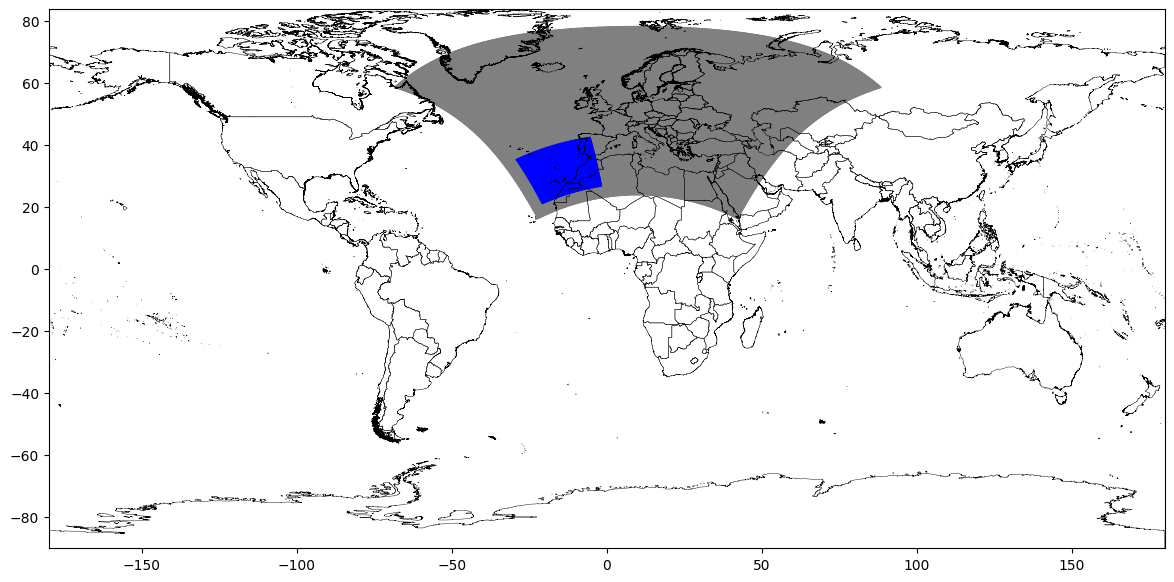

In [9]:
fig, ax = plt.subplots(1, figsize=(19, 7))
parent_nessy.shapefile.plot(ax=ax, facecolor="grey", edgecolor="grey")
nessy.shapefile.plot(ax=ax, facecolor="blue", edgecolor="blue")
countries = gpd.read_file('/gpfs/projects/bsc32/models/NES_tutorial_data/gadm_country_mask/gadm_country_ISO3166.shp')
countries.plot(ax=ax, facecolor="none", edgecolor='black', linewidth=0.3)
ax.margins(0)

## 3. Write dataset

### Write NetCDF

In [10]:
nessy.to_netcdf('rotated_nested_grid.nc', info=True)

Rank 000: Creating rotated_nested_grid.nc
Rank 000: NetCDF ready to write
Rank 000: Dimensions done


### Write shapefile

In [11]:
nessy.to_shapefile('rotated_nested_grid_shp')

/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/default_nes.py:3805: UserWarning: No vertical level has been specified. The first one will be selected.
  warn(msg)
/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/default_nes.py:3816: UserWarning: No time has been specified. The first one will be selected.
  warn(msg)
